In [1]:
import pandas as pd

DATA = '/kaggle/input/amazon-shoes-data/amazon_uk_shoes_products_dataset_2021_12.csv'

df = pd.read_csv(filepath_or_buffer=DATA, ).drop(columns=['url', 'uniq_id'])
df['scraped_at'] = '20' + df['scraped_at']
df['scraped_at'] = pd.to_datetime(df['scraped_at'])
df.head()

,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,scraped_at
0,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,2024-12-21 02:26:00
1,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2,True,Reviewed in the United States on 28 October 2021,NaN,2024-12-21 02:26:00
2,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5,True,Reviewed in the United States on 20 January 2021,NaN,2024-12-21 02:26:00
3,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5,True,Reviewed in the United States on 22 April 2021,NaN,2024-12-21 02:26:00
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,2024-12-21 02:26:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_name       6823 non-null   object        
 1   reviewer_name      6823 non-null   object        
 2   review_title       6822 non-null   object        
 3   review_text        6814 non-null   object        
 4   review_rating      6823 non-null   int64         
 5   verified_purchase  6823 non-null   bool          
 6   review_date        6823 non-null   object        
 7   helpful_count      1953 non-null   object        
 8   scraped_at         6823 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 433.2+ KB


In [3]:
df['review_rating'].value_counts().to_frame().T

review_rating,5,4,1,3,2
count,4255,917,654,605,392


Not surprisingly almost all of our ratings are 5/5.

In [4]:
df[['scraped_at', 'review_rating', 'verified_purchase']].groupby(by=['scraped_at', 'review_rating', 'verified_purchase']).size().reset_index().head()

,scraped_at,review_rating,verified_purchase,0
0,2024-12-21 02:26:00,1,True,148
1,2024-12-21 02:26:00,2,True,79
2,2024-12-21 02:26:00,3,True,117
3,2024-12-21 02:26:00,4,False,2
4,2024-12-21 02:26:00,4,True,170


We have essentially no reviews without a verified purchase,

<Axes: xlabel='scraped_at', ylabel='review_rating'>

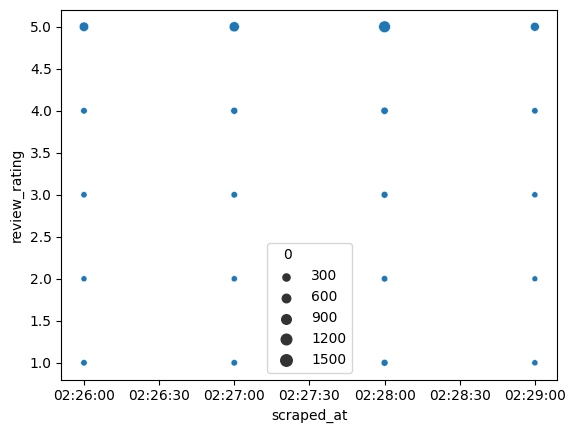

In [5]:
from seaborn import scatterplot

scatterplot(data=df[['scraped_at', 'review_rating']].groupby(by=['scraped_at', 'review_rating', ]).size().reset_index(), x='scraped_at', y='review_rating', size=0)

We have a lot of reviews, but they were scraped with exactly four timestamps, so we don't have much of a time series.